<a href="https://colab.research.google.com/github/Kvaathe/AAMD/blob/main/Junyper%20Dani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
import seaborn as sns
from matplotlib import pyplot
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
import struct

Carga el fichero directamente desde el directorio de GitHub

In [ ]:
url = "https://raw.githubusercontent.com/Kvaathe/AAMD/main/day.csv"

In [ ]:
dataset = read_csv(url)

Se puede ver en el fichero que no hay datos olvidados, pero es mucho más rápido con la función .isnull(). Como se puede apreciar a continuación, todos los datos han sido rellenados.

In [ ]:
print("Missing values: ", dataset.isnull().sum().sum())
print(dataset.isnull().any())

Missing values:  0
instant       False
dteday        False
season        False
yr            False
mnth          False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool


He identificado un valor numérico nulo que pandas no identifica. Esto es en la línea 70 de la columna hum. A continuación elimino dicha fila para que no afecte al dataset.

In [ ]:
print(len(dataset))
dataset = dataset.drop(69)
print(len(dataset))

731
730


Vamos a formalizar los datos. Para ello la temperatura al formato Celsio.

In [ ]:
dataset['temp'] = dataset['temp'].apply(lambda x: x*41)
print(dataset['temp'])
dataset['atemp'] = round(dataset['atemp'].apply(lambda x: x*50),2)
print(dataset['atemp'])
dataset['hum'] = dataset['hum'].apply(lambda x: x*100)
print(dataset['hum'])
dataset['windspeed'] = dataset['windspeed'].apply(lambda x: x*67)
print(dataset['windspeed'])

dataset.temp = dataset.temp.astype(int)
dataset.atemp = dataset.atemp.astype(int)
dataset.hum = dataset.hum.astype(int)
dataset.windspeed = dataset.windspeed.astype(int)

0      14.110847
1      14.902598
2       8.050924
3       8.200000
4       9.305237
         ...    
726    10.420847
727    10.386653
728    10.386653
729    10.489153
730     8.849153
Name: temp, Length: 730, dtype: float64
0      18.18
1      17.69
2       9.47
3      10.61
4      11.46
       ...  
726    11.33
727    12.75
728    12.12
729    11.58
730    11.17
Name: atemp, Length: 730, dtype: float64


La función .shape muestra el número de filas y columnas del dataset.

In [ ]:
print(dataset.shape)

(730, 16)


La función .head() muestra las primeras 3 instancias del dataset.

In [ ]:
print(dataset.head(3))

   instant      dteday  season  yr  ...  windspeed  casual  registered   cnt
0        1  2011-01-01       1   0  ...   0.160446     331         654   985
1        2  2011-01-02       1   0  ...   0.248539     131         670   801
2        3  2011-01-03       1   0  ...   0.248309     120        1229  1349

[3 rows x 16 columns]


A continuación, se muestra una descripción de todas las columnas del dataset.

In [ ]:
print(dataset.describe())

          instant      season  ...   registered          cnt
count  730.000000  730.000000  ...   730.000000   730.000000
mean   366.405479    2.498630  ...  3658.810959  4507.810959
std    211.025629    1.110184  ...  1559.693240  1936.275309
min      1.000000    1.000000  ...    20.000000    22.000000
25%    184.250000    2.000000  ...  2502.250000  3169.750000
50%    366.500000    3.000000  ...  3664.500000  4548.500000
75%    548.750000    3.000000  ...  4783.250000  5966.000000
max    731.000000    4.000000  ...  6946.000000  8714.000000

[8 rows x 15 columns]


La función .groupby() agrupa los datos según la columna que se le indica y .size() cuenta cuantas instancias hay de cada.

In [ ]:
print(dataset.groupby('cnt').size())

cnt
22      1
431     1
441     1
506     1
605     1
       ..
8294    1
8362    1
8395    1
8555    1
8714    1
Length: 696, dtype: int64


A continuación se muestra la cantidad de alquieres hechos por estación del año.

<Figure size 864x576 with 0 Axes>

([<matplotlib.axis.XTick at 0x7fecd16313d0>,
 [Text(0, 0, 'Spring'),
  Text(0, 0, 'Summer'),
  Text(0, 0, 'Autumn'),
  Text(0, 0, 'Winter')])

Text(0.5, 0, 'Season')

Text(0, 0.5, 'Total Rentals')

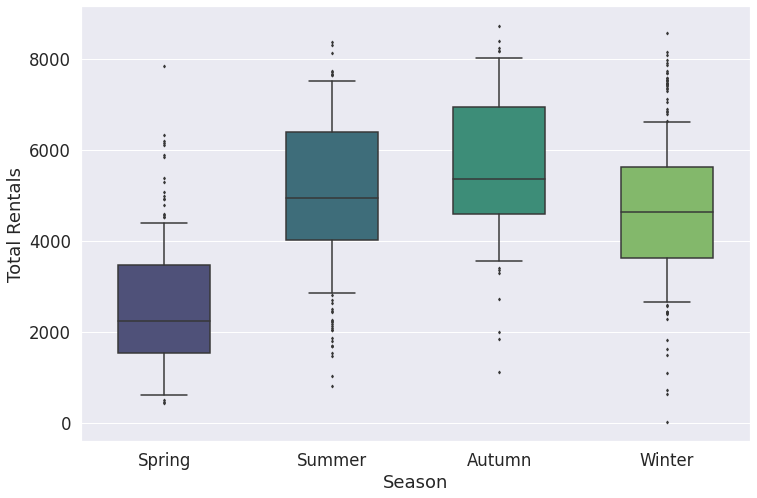

In [ ]:
#darkgrid, whitegrid, dark, white, ticks
sns.set_style("darkgrid")
#paper, notebook, talk, poster
sns.set_context("notebook", font_scale=1.5)
pyplot.figure(figsize=(12,8))
ax = sns.boxplot(x="season", y="cnt", data=dataset, width=.55, whis=.5, saturation=.6, fliersize=2,
             notch=False, palette='viridis')
pyplot.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Autumn', 'Winter'])
ax.set_xlabel("Season")
ax.set_ylabel("Total Rentals")
pyplot.show()

Lo mismo, pero por día de la semana.

<Figure size 864x576 with 0 Axes>

Text(0.5, 0, 'Weekday')

Text(0, 0.5, 'Total Rentals')

([<matplotlib.axis.XTick at 0x7fecd1567190>,
 [Text(0, 0, 'Monday'),
  Text(0, 0, 'Tuesday'),
  Text(0, 0, 'Wednesday'),
  Text(0, 0, 'Thursday'),
  Text(0, 0, 'Friday'),
  Text(0, 0, 'Saturday'),
  Text(0, 0, 'Sunday')])

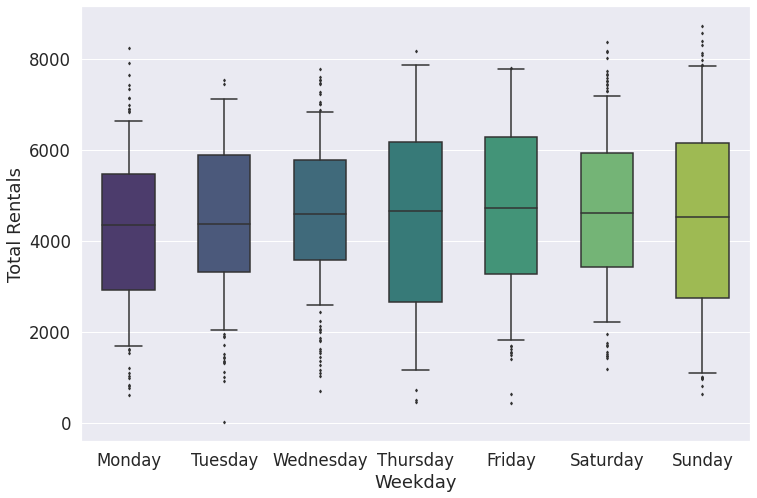

In [ ]:
#darkgrid, whitegrid, dark, white, ticks
sns.set_style("darkgrid")
#paper, notebook, talk, poster
sns.set_context("notebook", font_scale=1.5)
pyplot.figure(figsize=(12,8))
ax = sns.boxplot(x="weekday", y="cnt", data=dataset, width=.55, whis=.5, saturation=.6, fliersize=2,
             notch=False, palette='viridis')
ax.set_xlabel("Weekday")
ax.set_ylabel("Total Rentals")
pyplot.xticks([0, 1, 2, 3, 4, 5, 6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
pyplot.show()

Diferencia de alquieres entre los años 2011 y 2012.

<Figure size 864x576 with 0 Axes>

([<matplotlib.axis.XTick at 0x7fecd1558ad0>,
 [Text(0, 0, '2011'), Text(0, 0, '2012')])

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Total Rentals')

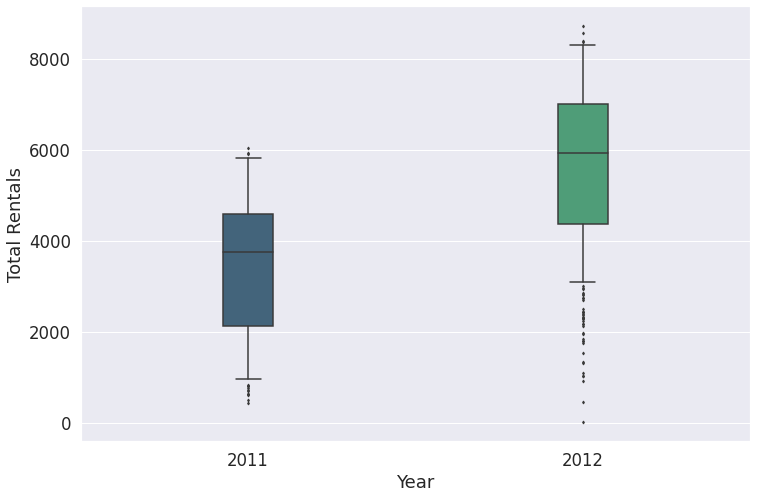

In [ ]:
#darkgrid, whitegrid, dark, white, ticks
sns.set_style("darkgrid")
#paper, notebook, talk, poster
sns.set_context("notebook", font_scale=1.5)
pyplot.figure(figsize=(12,8))
ax = sns.boxplot(x="yr", y="cnt", data=dataset, width=.15, whis=.5, saturation=.6, fliersize=2,
             notch=False, palette='viridis')
pyplot.xticks([0, 1], ['2011', '2012'])
ax.set_xlabel("Year")
ax.set_ylabel("Total Rentals")
pyplot.show()

Total de alquieres por mes del año.

<Figure size 864x576 with 0 Axes>

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Total Rentals')

([<matplotlib.axis.XTick at 0x7fecd13d4a50>,
 [Text(0, 0, 'Jan'),
  Text(0, 0, 'Feb'),
  Text(0, 0, 'Mar'),
  Text(0, 0, 'Apr'),
  Text(0, 0, 'May'),
  Text(0, 0, 'Jun'),
  Text(0, 0, 'Jul'),
  Text(0, 0, 'Aug'),
  Text(0, 0, 'Sep'),
  Text(0, 0, 'Oct'),
  Text(0, 0, 'Nov'),
  Text(0, 0, 'Dec')])

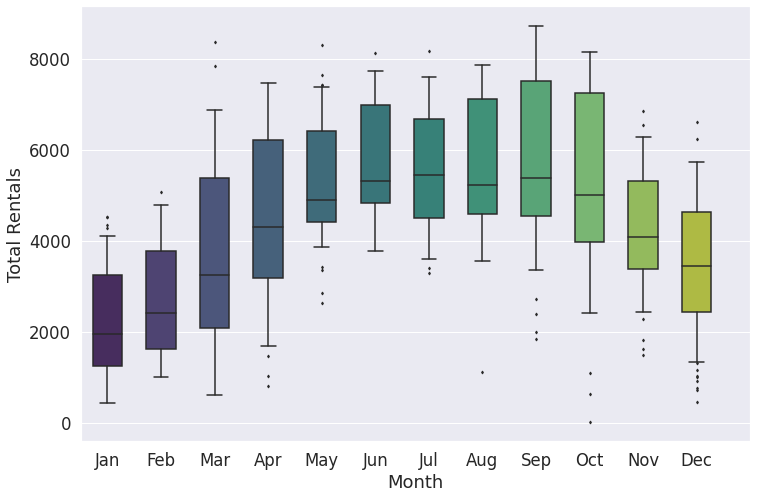

In [ ]:
#darkgrid, whitegrid, dark, white, ticks
sns.set_style("darkgrid")
#paper, notebook, talk, poster
sns.set_context("notebook", font_scale=1.5)
pyplot.figure(figsize=(12,8))
ax = sns.boxplot(x="mnth", y="cnt", data=dataset, width=.55, whis=.5, saturation=.6, fliersize=2,
             notch=False, palette='viridis')
ax.set_xlabel("Month")
ax.set_ylabel("Total Rentals")
pyplot.xticks([0, 1, 2, 3, 4, 5, 6, 7,8,9,10,11,12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep','Oct','Nov', 'Dec'])
pyplot.show()

Cantidad de alquieres dependiendo de la temperatura, transformándola al formato de grados celsios 

<Figure size 864x576 with 0 Axes>

(0.0, 46.0)

([<matplotlib.axis.XTick at 0x7fecd144e3d0>,
 <a list of 23 Text major ticklabel objects>)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Temperature')

Text(0, 0.5, 'Total Instances')

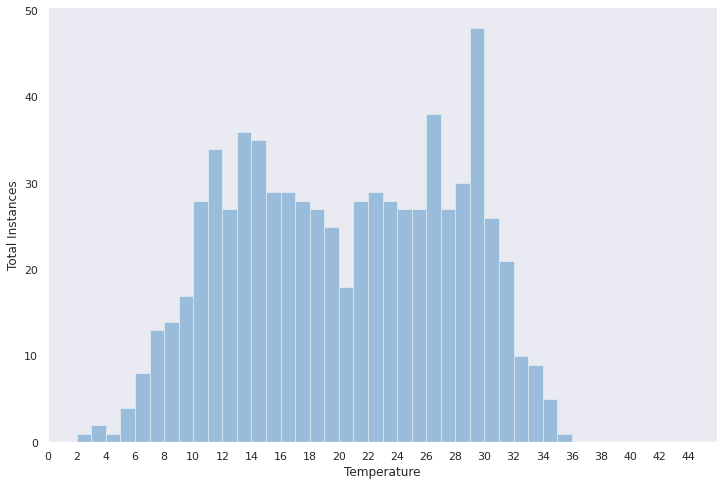

In [ ]:
#darkgrid, whitegrid, dark, white, ticks
sns.set_style("dark")
pyplot.figure(figsize=(12,8))
#paper, notebook, talk, poster
sns.set_context('notebook')
pyplot.xlim(0, 46)
pyplot.xticks(np.arange(0, 46, 2))
bins = np.arange(0, 50, 1)
x = temp
ax = sns.distplot(x, kde=False, bins=bins)
ax.set_xlabel("Temperature")
ax.set_ylabel("Total Instances")
pyplot.show()

instant          AxesSubplot(0.125,0.657941;0.133621x0.222059)
season        AxesSubplot(0.285345,0.657941;0.133621x0.222059)
yr             AxesSubplot(0.44569,0.657941;0.133621x0.222059)
mnth          AxesSubplot(0.606034,0.657941;0.133621x0.222059)
holiday       AxesSubplot(0.766379,0.657941;0.133621x0.222059)
weekday          AxesSubplot(0.125,0.391471;0.133621x0.222059)
workingday    AxesSubplot(0.285345,0.391471;0.133621x0.222059)
weathersit     AxesSubplot(0.44569,0.391471;0.133621x0.222059)
temp          AxesSubplot(0.606034,0.391471;0.133621x0.222059)
atemp         AxesSubplot(0.766379,0.391471;0.133621x0.222059)
hum                 AxesSubplot(0.125,0.125;0.133621x0.222059)
windspeed        AxesSubplot(0.285345,0.125;0.133621x0.222059)
casual            AxesSubplot(0.44569,0.125;0.133621x0.222059)
registered       AxesSubplot(0.606034,0.125;0.133621x0.222059)
cnt              AxesSubplot(0.766379,0.125;0.133621x0.222059)
dtype: object

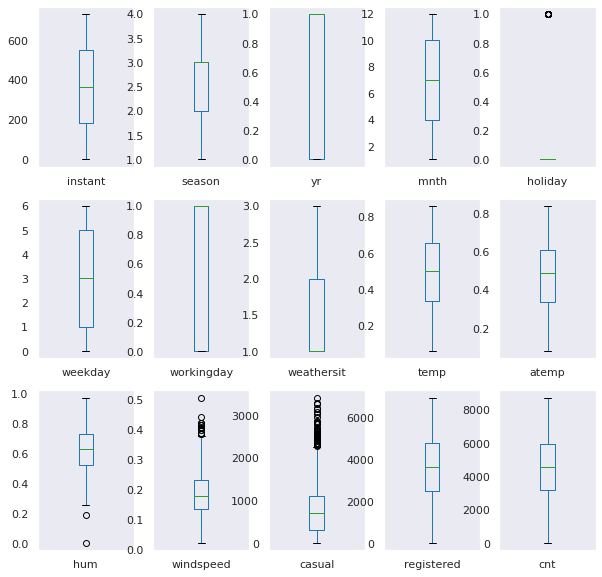

In [ ]:
dataset.plot(kind='box',subplots=True, layout=(3,5), sharex=False, sharey=False, figsize=(10,10))
pyplot.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fecd9bd99d0>,
      dtype=object)

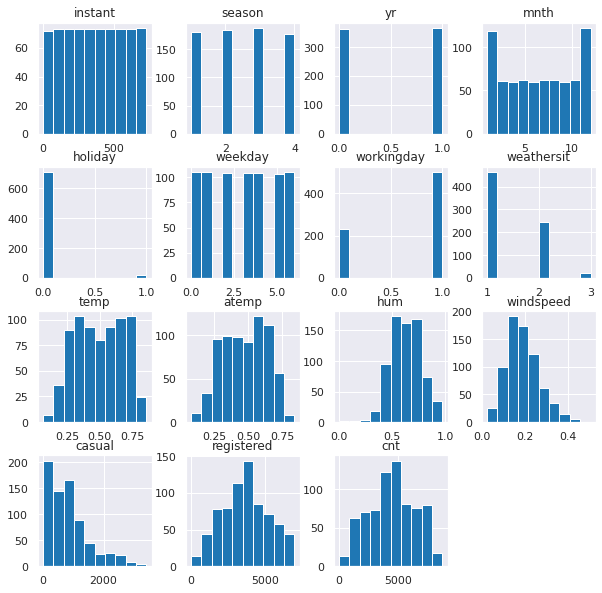

In [ ]:
dataset.hist(figsize=(10,10))
pyplot.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fecd6adcc50>,
      dtype=object)

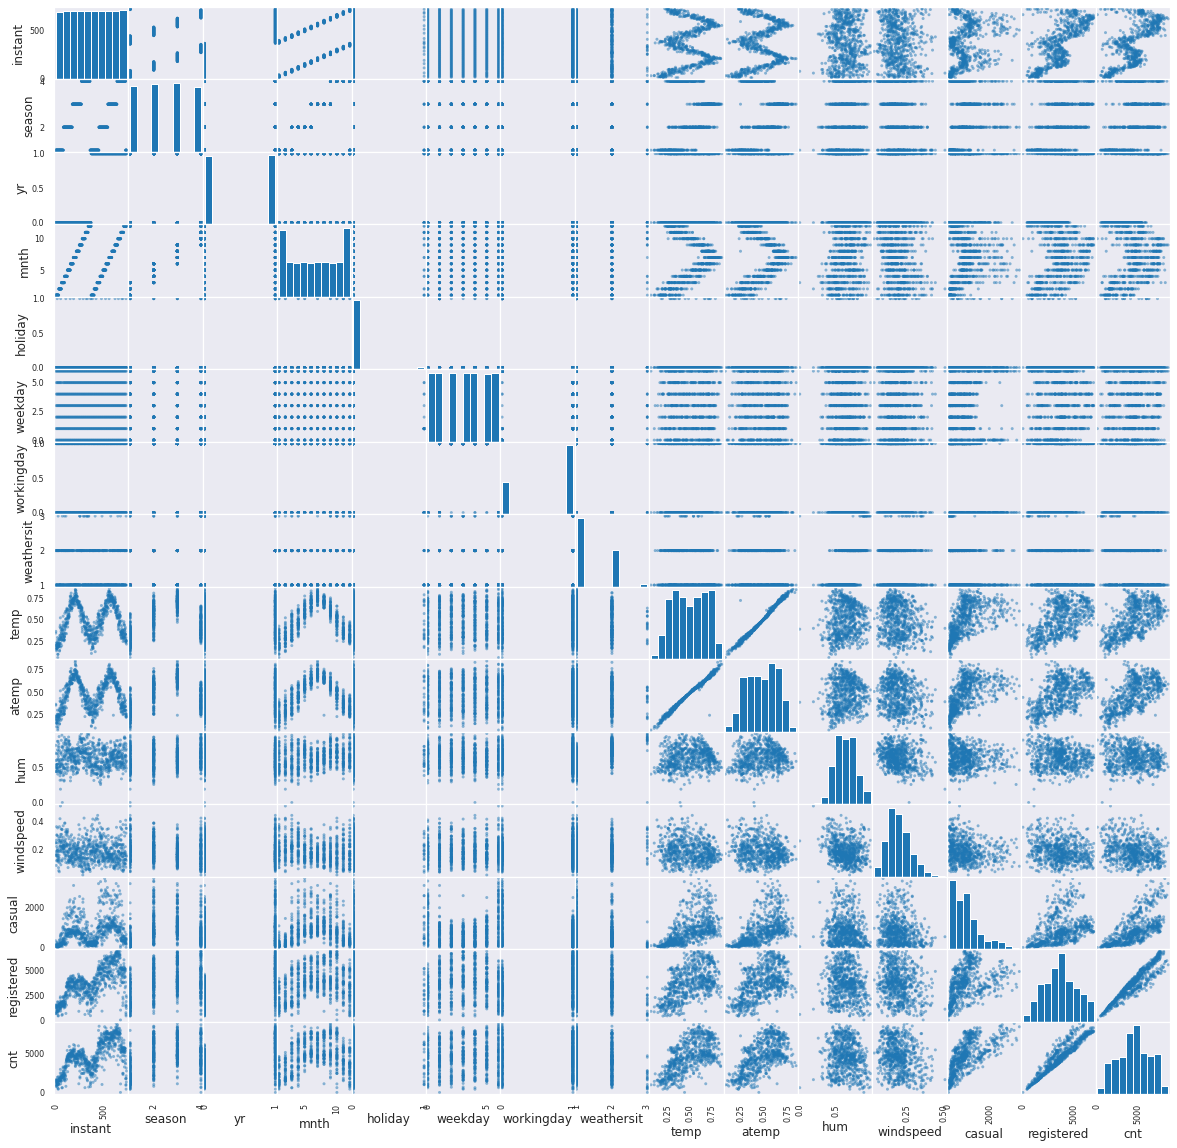

In [ ]:
scatter_matrix(dataset, figsize=(20,20))
pyplot.show()

Ahora vamos a eliminar aquellas columnas no necesarias.

In [ ]:
#instant, season, yr y dteday no hacen falta
dataset.drop('instant',axis=1,inplace=True)
dataset.drop('season',axis=1,inplace=True)
dataset.drop('yr',axis=1,inplace=True)
dataset.drop('dteday',axis=1,inplace=True) 
#weekday tiene alta correlación con working day
dataset.drop('weekday',axis=1,inplace=True)
#La columna holiday tiene alta correlación con workingday, por lo que se puede eliminar
dataset.drop('holiday',axis=1,inplace=True) 
#Lo mismo con atemp respecto a temp
dataset = dataset.drop('atemp',axis=1)
#Eliminar casual y registered?
#dataset.drop('casual',axis=1,inplace=True) 
#dataset.drop('registered',axis=1,inplace=True) 

In [ ]:
array = dataset.values
X = array[:, :-1]
y = array[:, -1]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.25, random_state=1, shuffle=True)

model.fit(X_train, Y_train) pide que Y_train sea enviado en binario, por ello se traduce en la siguiente parte del código.
A su vez, pasamos las fechas a valores numéricos para poder ser tratados más adelante por las funciones .fit y .predict.

In [ ]:
model = KNeighborsClassifier(n_neighbors=1)

In [ ]:
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
print(model)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


In [ ]:
print(accuracy_score(Y_validation, predictions))

0.00546448087431694


In [ ]:
print(model.predict([[12, 1, 2, 0.215833, 0.5775, 0.154846, 439, 2290]]))
print(" ", y[-1])

print(model.predict([[12, 0, 1, 0.255833, 0.483333,	 0.350754, 364, 1432]]))
print(" ", y[-2])

print(model.predict([[12, 0, 2, 0.253333, 0.752917, 0.124383, 159, 1182]]))
print(" ", y[-3])

print(model.predict([[1,	0, 2,	0.344167,	0.805833,	0.160446,	331,	654]]))
print(" ", y[0])

[2729.]
  2729.0
[1796.]
  1796.0
[1349.]
  1341.0
[801.]
  985.0
